In [ ]:
import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

import string
import re

In [ ]:
from sklearn.feature_extraction import _stop_words

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from time import time

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data  = pd.read_csv("/content/TextClassification/US-Economic-News.csv",encoding= "ISO-8859-1")


In [ ]:
data.shape

(8000, 15)

In [ ]:
data["relevance"].value_counts()

,count
relevance,
no,6571
yes,1420
not sure,9


In [ ]:
data = data[data.relevance != "not sure"]
data.shape

(7991, 15)

In [ ]:
# Text Processing

In [ ]:
data['relevance'] = data.relevance.map({'yes':1, 'no':0})

data = data[['text','relevance']]

data = data[:1000]
data.shape

(1000, 2)

In [ ]:
data.head(2)

,text,relevance
0,NEW YORK -- Yields on most certificates of dep...,1
1,The Wall Street Journal Online</br></br>The Mo...,0


In [ ]:
# Text Cleaning

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
stopwords = _stop_words.ENGLISH_STOP_WORDS
lemmtizer = WordNetLemmatizer()

In [ ]:
!pip install nltk


In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def clean(doc):
  text_no_namedentites = []
  documents = nlp(doc)
  ents = [e.text for e in documents.ents]
  for item in documents:
    if item.text in ents:
      pass
    else:
      text_no_namedentites.append(item.text)

  doc = (" ".join(text_no_namedentites))

  doc = doc.lower().strip()
  doc = doc.replace("</br>", " ")
  doc = doc.replace("-", " ")
  doc = "".join([char for char in doc if char not in string.punctuation and not char.isdigit()])

  doc = " ".join([token for token in doc.split() if token not in stopwords])

  doc = "".join([lemmtizer.lemmatize(word) for word in doc])

  return doc


In [ ]:
data['text'][0]

'NEW YORK -- Yields on most certificates of deposit offered by major banks dropped more than a tenth of a percentage point in the latest week, reflecting the overall decline in short-term interest rates.</br></br>On small-denomination, or "consumer," CDs sold directly by banks, the average yield on six-month deposits fell to 5.49% from 5.62% in the week ended yesterday, according to an 18-bank survey by Banxquote Money Markets, a Wilmington, Del., information service.</br></br>On three-month "consumer" deposits, the average yield sank to 5.29% from 5.42% the week before, according to Banxquote. Two banks in the Banxquote survey, Citibank in New York and CoreStates in Pennsylvania, are paying less than 5% on threemonth small-denomination CDs.</br></br>Declines were somewhat smaller on five-year consumer CDs, which eased to 7.37% from 7.45%, Banxquote said.</br></br>Yields on three-month and six-month Treasury bills sold at Monday\'s auction plummeted more than a fifth of a percentage po

In [ ]:
clean(data['text'][0])

'new york yields certificates deposit offered major banks dropped tenth percentage point latest week reflecting overall decline short term rates br small denomination consumer cds sold directly banks average yield month deposits fell week ended yesterday according bank survey money markets information service br month consumer deposits average yield sank week according banks survey new york paying small denomination declines somewhat smaller year consumer cds eased said br yields month month bills sold s auction plummeted fifth percentage point previous week respectively'

In [ ]:
data['text'] = data['text'].apply(clean)
data.head()

,text,relevance
0,new york yields certificates deposit offered m...,1
1,wall street journal online br morning brief lo...,0
2,effort achieve banking reform negotiators admi...,0
3,statistics enormous costs employee drug abuse ...,0
4,new york indecision marked dollar s tone trade...,1


In [ ]:
# Now we are ready for the modeling. We are going to use algorithms from sklearn package. We will go through the following steps:

# Split the data into training and test sets (80% train, 20% test)
# Extract features from the training data using TfidfVectorizer.
# Transform the test data into the same feature vector as the training data.
# Train the classifier
# Evaluate the classifier

In [ ]:
doc  = list(data['text'])
tfidf_vectorizer  = TfidfVectorizer(use_idf=True, max_features=2000)

tfidf_vectorizer_vectors = tfidf_vectorizer.fit_transform(doc)


In [ ]:
tfidf_vectorizer_vectors

<1000x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 66936 stored elements in Compressed Sparse Row format>

In [ ]:
tfidf_vectorizer_vectors.toarray()
docs = tfidf_vectorizer_vectors.toarray()

In [ ]:
len(tfidf_vectorizer_vectors.toarray())

1000

In [ ]:
len(doc)

1000

In [ ]:
data['relevance']

,relevance
0,1
1,0
2,0
3,0
4,1
...,...
996,0
997,0
998,1
999,0


In [ ]:
docs[0].shape

(2000,)

In [ ]:
X =docs
y= data['relevance']

print(X.shape,y.shape)


(1000, 2000) (1000,)


In [ ]:
SEED=123
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(800, 2000) (800,)
(200, 2000) (200,)


In [ ]:
# Naive Bayes Classifier

In [ ]:
gnb = GaussianNB()
%time gnb.fit(X_train, y_train)

y_pred_train = gnb.predict(X_train)
y_pred_test = gnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 25.3 ms, sys: 14.1 ms, total: 39.5 ms
Wall time: 83 ms

Training Accuracy score: 0.8975
Testing Accuracy score: 0.735


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.83      0.81      0.82       151
    relevant       0.46      0.49      0.48        49

    accuracy                           0.73       200
   macro avg       0.65      0.65      0.65       200
weighted avg       0.74      0.73      0.74       200



<Axes: >

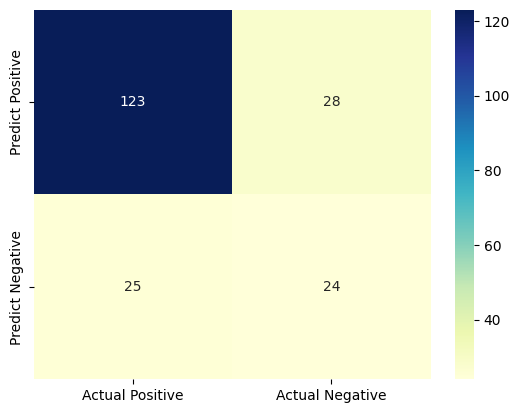

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

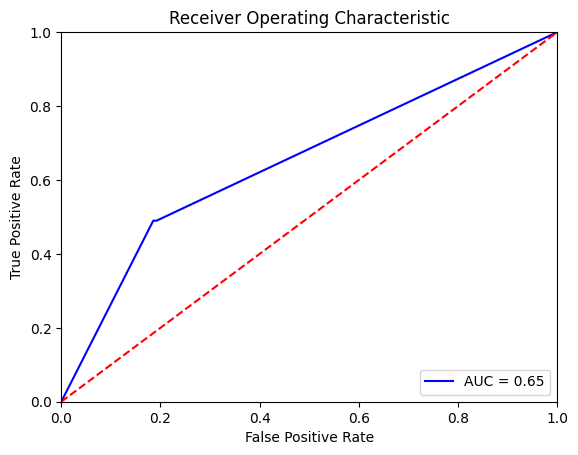

In [ ]:
probs = gnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Gaussian Naive Bayes performs poorly in this case because of the prior and posterior probability condition

In [ ]:
# Multinomial Naive Bayes

In [ ]:
mnb = MultinomialNB()
%time mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)
y_pred_test = mnb.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 15.1 ms, sys: 4.99 ms, total: 20.1 ms
Wall time: 33.1 ms

Training Accuracy score: 0.8
Testing Accuracy score: 0.78


In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.77      1.00      0.87       151
    relevant       1.00      0.10      0.19        49

    accuracy                           0.78       200
   macro avg       0.89      0.55      0.53       200
weighted avg       0.83      0.78      0.70       200



<Axes: >

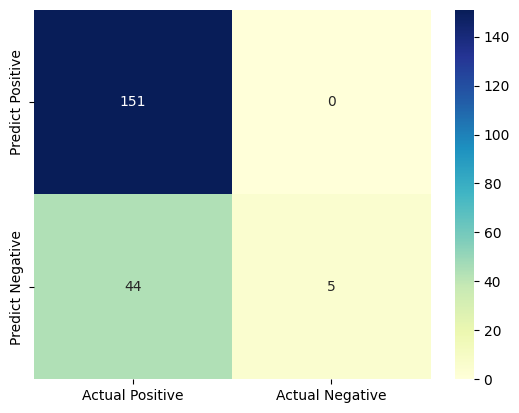

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
# plt.show()

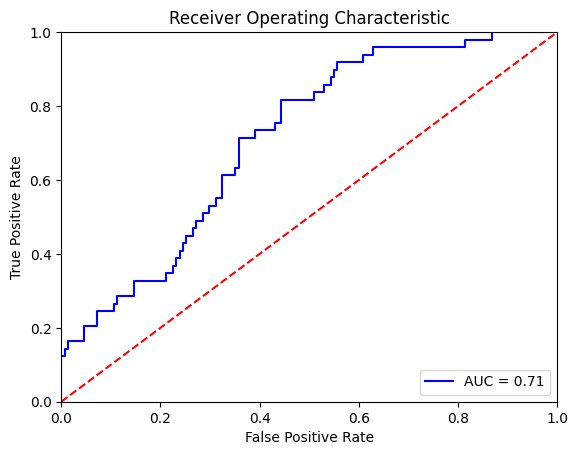

In [ ]:
import matplotlib.pyplot as plt

probs = mnb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [ ]:
# Multinomial Naive Bayes performs slightly better than Gaussian Naive Bayes,
#  but the low AUC score is because the size of feature vector is really big
#  and Bayes Algorothm works better for small number of features.
#   Let's check out results of Logistic Regression, Support Vector Machines
#   and Decision Tree Classifier.

In [ ]:
# Logistic Regression Classifier

In [ ]:
lr = LogisticRegression(random_state=SEED)
%time lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 90.4 ms, sys: 61.5 ms, total: 152 ms
Wall time: 114 ms

Training Accuracy score: 0.825
Testing Accuracy score: 0.76


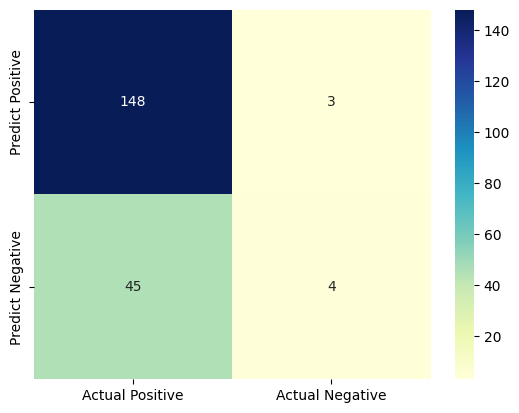

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
#print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.77      0.98      0.86       151
    relevant       0.57      0.08      0.14        49

    accuracy                           0.76       200
   macro avg       0.67      0.53      0.50       200
weighted avg       0.72      0.76      0.68       200



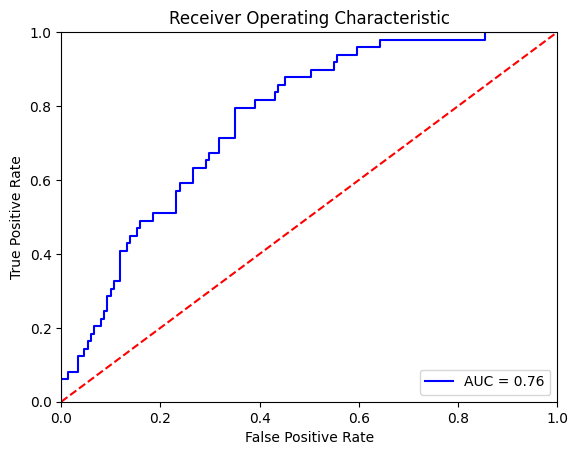

In [ ]:
probs = lr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Support Vector Machines

In [ ]:
svc =  LinearSVC(class_weight='balanced')
%time svc.fit(X_train, y_train)

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 28.2 ms, sys: 0 ns, total: 28.2 ms
Wall time: 80.1 ms

Training Accuracy score: 0.98625
Testing Accuracy score: 0.72


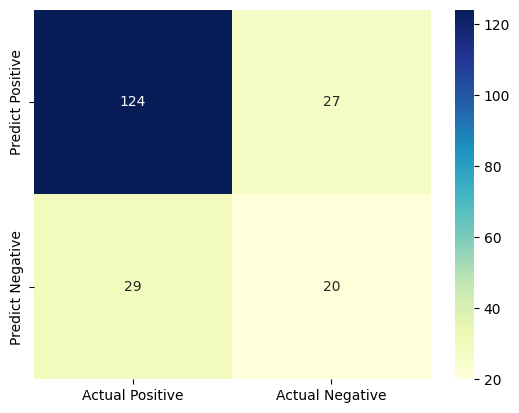

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.81      0.82      0.82       151
    relevant       0.43      0.41      0.42        49

    accuracy                           0.72       200
   macro avg       0.62      0.61      0.62       200
weighted avg       0.72      0.72      0.72       200



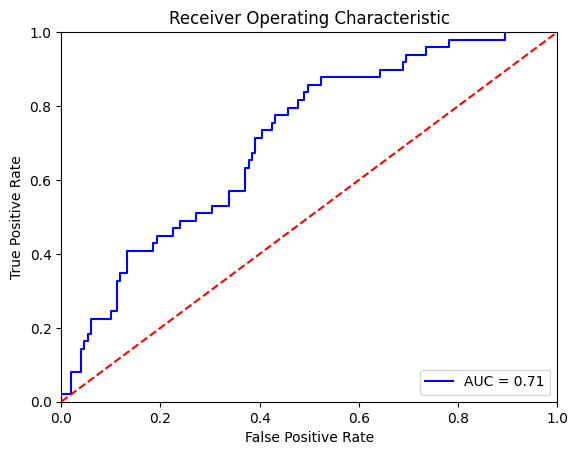

In [ ]:
probs = svc._predict_proba_lr(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
# Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=SEED)
%time dt.fit(X_train, y_train)

y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print("\nTraining Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

CPU times: user 483 ms, sys: 2.84 ms, total: 486 ms
Wall time: 608 ms

Training Accuracy score: 1.0
Testing Accuracy score: 0.67


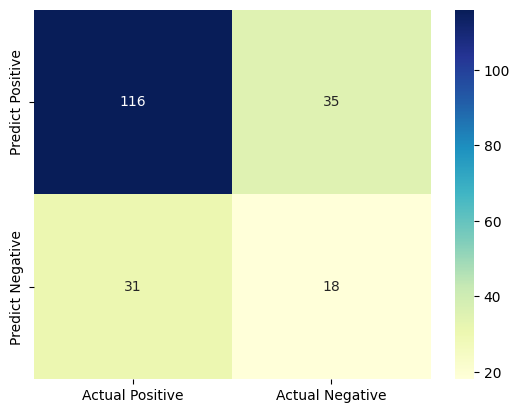

In [ ]:
cm = confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive', 'Actual Negative'],
                        index=['Predict Positive', 'Predict Negative'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred_test, target_names=['not relevant', 'relevant']))

              precision    recall  f1-score   support

not relevant       0.79      0.77      0.78       151
    relevant       0.34      0.37      0.35        49

    accuracy                           0.67       200
   macro avg       0.56      0.57      0.57       200
weighted avg       0.68      0.67      0.67       200



In [ ]:
# Ensembling

In [ ]:
from sklearn.ensemble import VotingClassifier

classifiers = [('Decision Tree', dt),
               ('Logistic Regression', lr),
                ('Naive Bayes', gnb)
              ]
vc = VotingClassifier(estimators=classifiers)
# Fit 'vc' to the traing set and predict test set labels
vc.fit(X_train, y_train)
y_pred_train=vc.predict(X_train)
y_pred_test = vc.predict(X_test)
print("Training Accuracy score:",accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",accuracy_score(y_test, y_pred_test))

Training Accuracy score: 1.0
Testing Accuracy score: 0.77


In [ ]:
predictions = pd.Series(vc.predict(X), name="relevant")
results = pd.concat([predictions],axis=1)

In [ ]:
results

,relevant
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,1
998,0
